In [5]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib


In [6]:
msk_list=sorted(glob.glob("NIFTIs_Masks/*msk.nii"))
img_list=sorted(glob.glob("NIFTIs_Images/*img.nii"))
sample_name = ('10005_19010618_eTRA-3D-T1Gd')
img = nib.load('NIFTIs_Images/{}_img.nii'.format(sample_name)).get_fdata()
mask = nib.load('NIFTIs_Masks/{}_msk.nii'.format(sample_name)).get_fdata()
print(img.shape, img.size)
print(mask.shape, mask.size)

(256, 256, 160) 10485760
(256, 256, 160) 10485760


17.431116538084744
0.0
0.9999999999999991
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0.00000000e+00 1.26312439e-02 2.52624877e-02 ... 1.60290485e+01
 1.73174353e+01 1.74311165e+01]


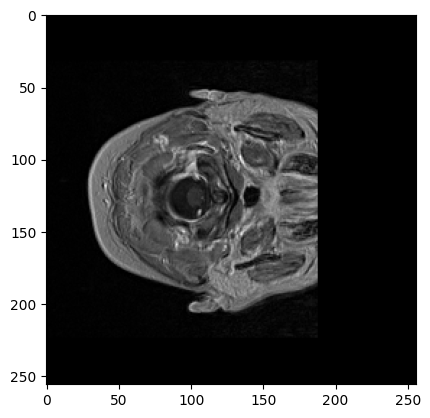

In [18]:
img = (img - img.min()) / img.max()
print(img.max())
print(img.min())
print(img.mean())
print(img[:, :, 1])
print(np.unique(img))
plt.imshow(img[:, :, 1], cmap='gray')

In [7]:
for mask in msk_list[:3]:
    mask = nib.load(mask).get_fdata()
    print(mask.shape, mask.size)
    print(np.unique(mask))
    mask[mask!=0] = 1.0
    print(mask.sum())
    print(mask.sum() / mask.size)

(256, 256, 160) 10485760
[ 0. 11.]
170.0
1.621246337890625e-05
(256, 256, 170) 11141120
[ 0. 11. 31. 32.]
2073.0
0.0001860674689797794
(256, 256, 140) 9175040
[ 0. 11. 12. 31. 32.]
5737.0
0.0006252833775111607


373


(array([254.,  52.,  33.,  15.,   7.,   4.,   3.,   3.,   1.,   1.]),
 array([1.43051147e-06, 5.24114740e-04, 1.04679897e-03, 1.56948320e-03,
        2.09216743e-03, 2.61485166e-03, 3.13753588e-03, 3.66022011e-03,
        4.18290434e-03, 4.70558857e-03, 5.22827280e-03]),
 <BarContainer object of 10 artists>)

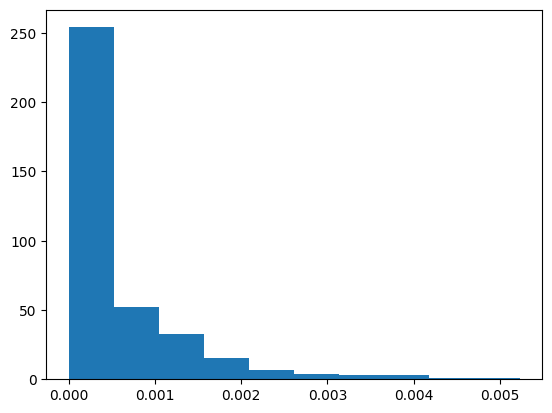

In [5]:
cancer_amount = []
print(len(msk_list))
for mask in msk_list:
    mask = nib.load(mask).get_fdata()
    mask[mask!=0] = 1.0
    cancer_amount.append(mask.sum() / mask.size)
plt.hist(cancer_amount)
